In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns


import statsmodels.api as sm
from statsmodels.tsa.filters.filtertools import convolution_filter
import statsmodels.graphics.tsaplots as tsplots
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.tsa.forecasting.stl import STLForecast
from statsmodels.tsa.arima.model import ARIMA

In [2]:
tutiondata = pd.read_csv(r'C:\Users\prem_\OneDrive\Personal\AIML\CapstoneProject\FullTutionData.csv',sep='|')
tutiondata.head()

,Year,InstitutionType,Total Fee,4YrProgram,2YrProgram
0,1963-64,All,"$11,411","$11,760","$7,091"
1,1968-69,All,"11,533","12,219","8,326"
2,1969-70,All,"11,647","12,501","8,133"
3,1970-71,All,"11,733","12,668","7,954"
4,1971-72,All,"11,860","12,868","8,031"


In [3]:
#Cleanup the data , it has commas and symbol for dollars.
wrkdata  = tutiondata
wrkdata['Total Fee'] = wrkdata['Total Fee'].str.replace('$', '').str.replace(',', '')
wrkdata['4YrProgram'] = wrkdata['4YrProgram'].str.replace('$', '').str.replace(',', '')
wrkdata['2YrProgram'] = wrkdata['2YrProgram'].str.replace('$', '').str.replace(',', '')
wrkdata.head()

,Year,InstitutionType,Total Fee,4YrProgram,2YrProgram
0,1963-64,All,11411,11760,7091
1,1968-69,All,11533,12219,8326
2,1969-70,All,11647,12501,8133
3,1970-71,All,11733,12668,7954
4,1971-72,All,11860,12868,8031


In [4]:
# The year given is calendar year, for our analysis lets take the starting year as the year for which tution fee is given

In [5]:
wrkdata['Soy'] = '01-01-'+ wrkdata['Year'].str[:4]
wrkdata.head()

,Year,InstitutionType,Total Fee,4YrProgram,2YrProgram,Soy
0,1963-64,All,11411,11760,7091,01-01-1963
1,1968-69,All,11533,12219,8326,01-01-1968
2,1969-70,All,11647,12501,8133,01-01-1969
3,1970-71,All,11733,12668,7954,01-01-1970
4,1971-72,All,11860,12868,8031,01-01-1971


In [6]:
# Make Soy as Index and drop the Soy and Year columns 
wrkdata['Soy'] = pd.to_datetime(wrkdata['Soy'])
#wrkdata = wrkdata.set_index('Soy')
#wrkdata = wrkdata.asfreq('A')

# df[df.index.duplicated()]
boolean = wrkdata.duplicated(subset=['Soy']).any()
print(boolean, end='\n\n') # True

True



In [7]:
wrkdata = wrkdata.drop(columns = ['Year'])

In [8]:
wrkdata
wrkdata.head()

,InstitutionType,Total Fee,4YrProgram,2YrProgram,Soy
0,All,11411,11760,7091,1963-01-01
1,All,11533,12219,8326,1968-01-01
2,All,11647,12501,8133,1969-01-01
3,All,11733,12668,7954,1970-01-01
4,All,11860,12868,8031,1971-01-01


In [9]:
# Currently the table has fee for Public , Private and combining all the institutions.
# Create a dataframe for each of the type to see the trend.

In [10]:

wrkdata['InstitutionType'].value_counts()

InstitutionType
All        55
Public     55
Private    55
Name: count, dtype: int64

In [11]:
PublicSchool = wrkdata[wrkdata['InstitutionType']=='Public']
PublicSchool.head()

,InstitutionType,Total Fee,4YrProgram,2YrProgram,Soy
55,Public,8344,8491,5761,1963-01-01
56,Public,8789,9037,6982,1968-01-01
57,Public,8933,9242,7100,1969-01-01
58,Public,9059,9413,7085,1970-01-01
59,Public,9232,9628,7354,1971-01-01


In [12]:
PrivateSchool = wrkdata[wrkdata['InstitutionType']=='Private']
PrivateSchool.head()

,InstitutionType,Total Fee,4YrProgram,2YrProgram,Soy
110,Private,16597,16548,12006,1963-01-01
111,Private,18353,18630,14834,1968-01-01
112,Private,18870,19103,14880,1969-01-01
113,Private,19375,19555,14930,1970-01-01
114,Private,19891,20003,14982,1971-01-01


In [16]:
AllSchool = wrkdata[wrkdata['InstitutionType']=='All']
AllSchool.head()

,InstitutionType,Total Fee,4YrProgram,2YrProgram,Soy
0,All,11411,11760,7091,1963-01-01
1,All,11533,12219,8326,1968-01-01
2,All,11647,12501,8133,1969-01-01
3,All,11733,12668,7954,1970-01-01
4,All,11860,12868,8031,1971-01-01


In [17]:
PublicSchool = PublicSchool.drop(columns = ['4YrProgram','2YrProgram'])
PublicSchool = PublicSchool.drop(columns = ['InstitutionType']) 
PublicSchool.drop(PublicSchool[PublicSchool['Soy'] == '1963-01-01'].index, inplace=True)
PublicSchool =  PublicSchool.set_index('Soy')
PublicSchool

,Total Fee
Soy,
1968-01-01,8789
1969-01-01,8933
1970-01-01,9059
1971-01-01,9232
1972-01-01,9568
1973-01-01,9164
1974-01-01,8501
1975-01-01,8457
1976-01-01,8596


In [18]:
PublicSchool['Total Fee'] = pd.to_numeric(PublicSchool['Total Fee'],errors = 'coerce')
PublicSchool.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 54 entries, 1968-01-01 to 2021-01-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Total Fee  54 non-null     int64
dtypes: int64(1)
memory usage: 864.0 bytes


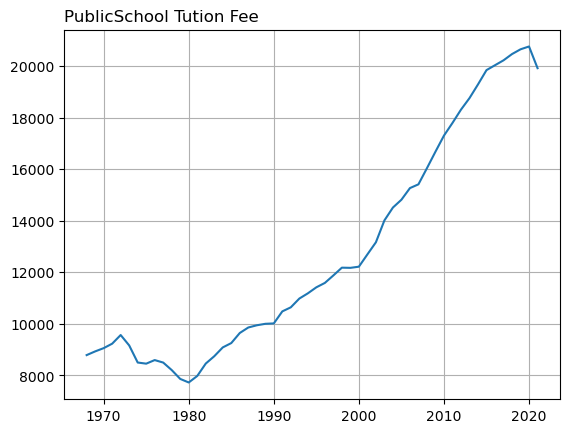

In [19]:
plt.plot(PublicSchool)
plt.title('PublicSchool Tution Fee', loc = 'left')
plt.grid();

In [20]:

y_hist = ''
y_future = ''

### BEGIN SOLUTION
y_hist = PublicSchool[:'01-01-2010']
y_future = PublicSchool['01-01-2011':]
### END SOLUTION

# Answer check
print('Historical:')
print(y_hist.tail())
print('=========\nFuture:')
print(y_future.head())

Historical:
            Total Fee
Soy                  
2006-01-01      15268
2007-01-01      15414
2008-01-01      16040
2009-01-01      16681
2010-01-01      17305
Future:
            Total Fee
Soy                  
2011-01-01      17795
2012-01-01      18311
2013-01-01      18759
2014-01-01      19290
2015-01-01      19845


Text(0.5, 1.0, 'Tution Fee Trend ')

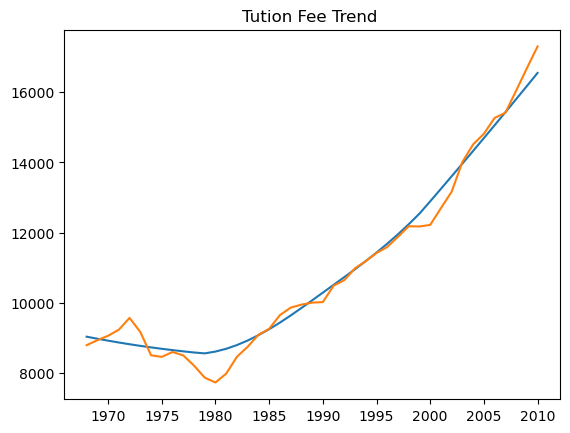

In [21]:
### GRADED

stl = ''
results = ''

### BEGIN SOLUTION
stl = STL(y_hist['Total Fee'], period = 12)
results = stl.fit()
results
### END SOLUTION

## Answer check
plt.plot(results.trend)
plt.plot(y_hist)
plt.title('Tution Fee Trend ')

In [22]:
season_and_trend = ''
season_and_trend = results.seasonal + results.trend


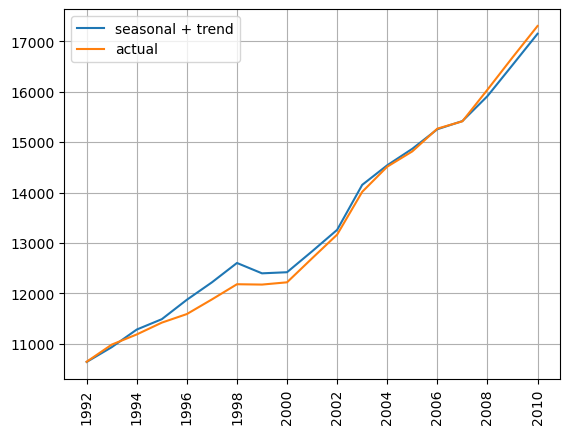

In [23]:
plt.plot(season_and_trend['1992':], label = 'seasonal + trend')
plt.plot(y_hist['1992':], label = 'actual')
plt.grid()
plt.legend()
plt.xticks(rotation = 90);

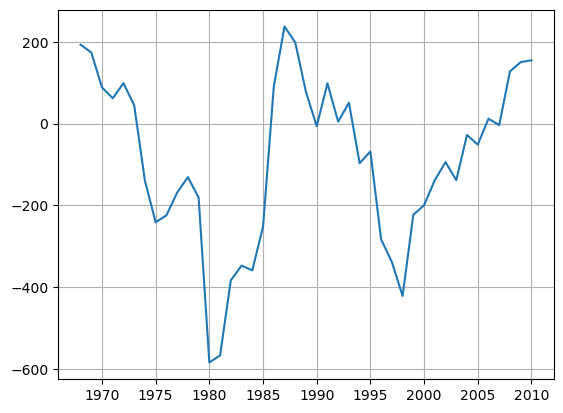

In [24]:
plt.plot(results.resid)
plt.grid()

In [25]:
#instantiate
stlf = STLForecast(y_hist['Total Fee'], ARIMA, model_kwargs={'order':(1, 1, 0), 'trend':"t"},period = 12)
#fit model using historical data
stlf_results = stlf.fit()
#produce forecast for future data
forecast = stlf_results.forecast(25)

C:\Users\prem_\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\prem_\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\prem_\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


In [26]:

forecast
results_df = pd.DataFrame(forecast)
results_df = results_df.reset_index()
results_df = results_df.rename(columns={'index': 'year', 0: 'Tutionfee'})
#results_df['year'] = pd.to_datetime(results_df['year']).dt.date
results_df
#print (forecast[1])
results_df

,year,Tutionfee
0,2011-01-01,16869.793400
1,2012-01-01,16798.556039
2,2013-01-01,17080.577151
3,2014-01-01,17347.989739
4,2015-01-01,18063.373842
5,2016-01-01,18262.022182
6,2017-01-01,18390.034431
7,2018-01-01,18570.319758
8,2019-01-01,18518.919213
9,2020-01-01,18795.745972


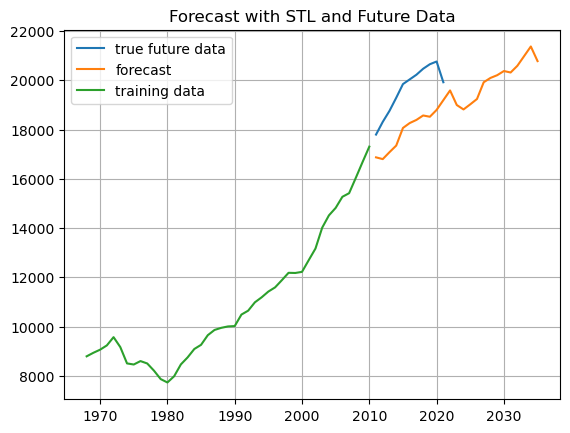

In [27]:
plt.plot(y_future['Total Fee'], label = 'true future data')
plt.plot(forecast, label = 'forecast')
plt.plot(y_hist['1964':], label = 'training data')
plt.legend()
plt.title('Forecast with STL and Future Data')
plt.grid();


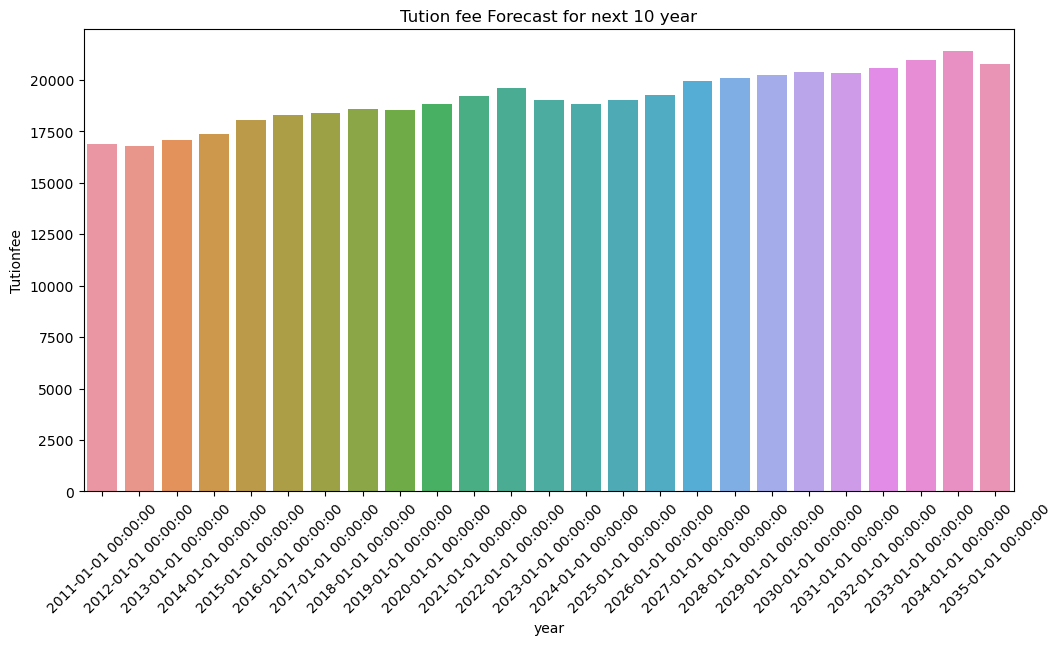

In [28]:
import matplotlib.pyplot as plt

#results_df = results_df[results_df['year'] > '2021-01-01']
# results_df['year'] = pd.to_datetime(results_df['year']).dt.date
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=results_df, x='year', y='Tutionfee')
ax.tick_params(axis='x', labelrotation=45)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
# ax.set_xticks(ticks=ax.get_xticks(), labels=ax.get_xticklabels(), rotation=45, ha='right')
plt.title('Tution fee Forecast for next 10 year')
plt.show()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 54 entries, 1968-01-01 to 2021-01-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Total Fee  54 non-null     int64
dtypes: int64(1)
memory usage: 864.0 bytes
Historical:
            Total Fee
Soy                  
2006-01-01      39291
2007-01-01      39656
2008-01-01      40420
2009-01-01      40782
2010-01-01      40661
Future:
            Total Fee
Soy                  
2011-01-01      40970
2012-01-01      42036
2013-01-01      43204
2014-01-01      44592
2015-01-01      46181


C:\Users\prem_\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\prem_\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\prem_\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


2011-01-01    42371.120282
2012-01-01    42763.325997
2013-01-01    43513.186477
2014-01-01    43915.389721
2015-01-01    45044.602477
2016-01-01    45233.206696
2017-01-01    45307.550854
2018-01-01    46001.374544
2019-01-01    46284.373448
2020-01-01    46770.341110
2021-01-01    46916.746336
2022-01-01    46879.320921
2023-01-01    48607.086557
2024-01-01    49003.017788
2025-01-01    49753.664848
2026-01-01    50156.034165
2027-01-01    51285.281985
2028-01-01    51473.893606
2029-01-01    51548.239327
2030-01-01    52242.063348
2031-01-01    52525.062321
2032-01-01    53011.029998
2033-01-01    53157.435227
2034-01-01    53120.009812
2035-01-01    54847.775449
Freq: AS-JAN, dtype: float64

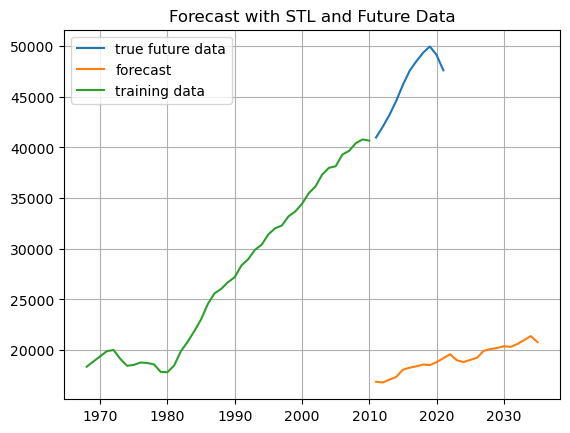

In [30]:
PrivateSchool = PrivateSchool.drop(columns = ['4YrProgram','2YrProgram'])
PrivateSchool = PrivateSchool.drop(columns = ['InstitutionType']) 
PrivateSchool.drop(PrivateSchool[PrivateSchool['Soy'] == '1963-01-01'].index, inplace=True)
PrivateSchool =  PrivateSchool.set_index('Soy')
PrivateSchool
PrivateSchool['Total Fee'] = pd.to_numeric(PrivateSchool['Total Fee'],errors = 'coerce')
PrivateSchool.info()
#plt.plot(PrivateSchool)
#plt.title('PrivateSchool Tution Fee', loc = 'left')
#plt.grid();

y_hist_priv = ''
y_future_priv = ''

### BEGIN SOLUTION
y_hist_priv = PrivateSchool[:'01-01-2010']
y_future_priv = PrivateSchool['01-01-2011':]
### END SOLUTION

# Answer check
print('Historical:')
print(y_hist_priv.tail())
print('=========\nFuture:')
print(y_future_priv.head())
### GRADED

stl_1 = ''
results_1 = ''

### BEGIN SOLUTION
stl_1 = STL(y_hist_priv['Total Fee'], period = 12)
results_1 = stl_1.fit()
results_1
### END SOLUTION

## Answer check
#plt.plot(results_1.trend)
#plt.plot(y_hist_priv)
#plt.title('Tution Fee Trend ')


season_and_trend_1 = ''
season_and_trend_1 = results_1.seasonal + results_1.trend


#plt.plot(season_and_trend_1['1992':], label = 'seasonal + trend')
#plt.plot(y_hist_priv['1992':], label = 'actual')
#plt.grid()
#plt.legend()
#plt.xticks(rotation = 90);

#plt.plot(results_1.resid)
#plt.grid()

#instantiate
stl_1f = STLForecast(y_hist_priv['Total Fee'], ARIMA, model_kwargs={'order':(1, 1, 0), 'trend':"t"},period = 12)
#fit model using historical data
stl_1f_results_1 = stl_1f.fit()
#produce forecast for future data
forecast1 = stl_1f_results_1.forecast(25)


plt.plot(y_future_priv['Total Fee'], label = 'true future data')
plt.plot(forecast, label = 'forecast')
plt.plot(y_hist_priv['1964':], label = 'training data')
plt.legend()
plt.title('Forecast with STL and Future Data')
plt.grid();
forecast1

In [31]:
forecast1
results_df1 = pd.DataFrame(forecast1)
results_df1 = results_df1.reset_index()
results_df1 = results_df1.rename(columns={'index': 'year', 0: 'Tutionfee'})
#results_df['year'] = pd.to_datetime(results_df['year']).dt.date
results_df1



,year,Tutionfee
0,2011-01-01,42371.120282
1,2012-01-01,42763.325997
2,2013-01-01,43513.186477
3,2014-01-01,43915.389721
4,2015-01-01,45044.602477
5,2016-01-01,45233.206696
6,2017-01-01,45307.550854
7,2018-01-01,46001.374544
8,2019-01-01,46284.373448
9,2020-01-01,46770.341110


C:\Users\prem_\AppData\Local\Temp\ipykernel_23384\812911065.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df1['year'] = pd.to_datetime(results_df1['year']).dt.date


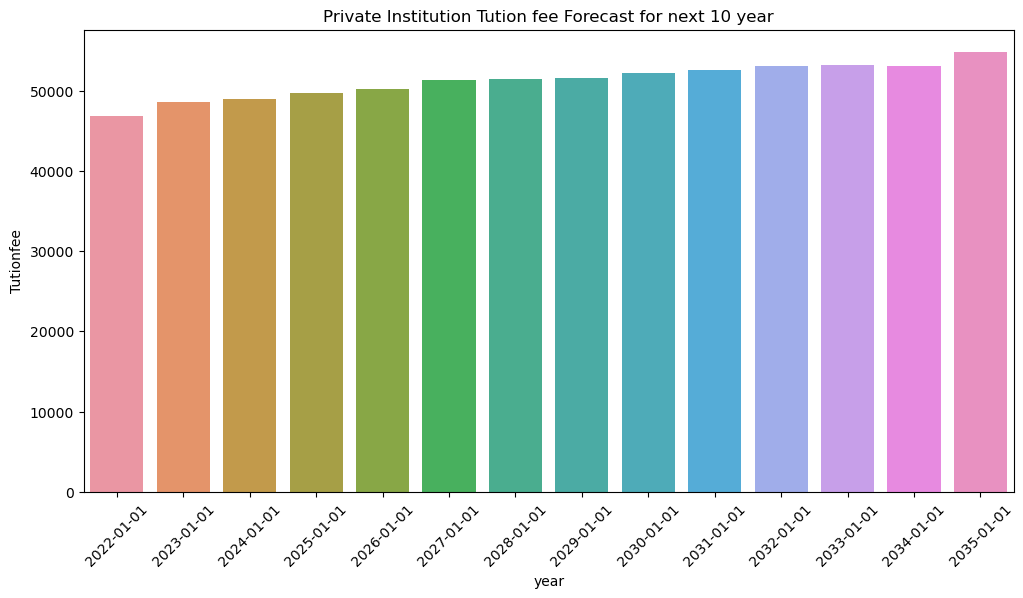

In [32]:
results_df1 = results_df1[results_df1['year'] > '2021-01-01']
results_df1['year'] = pd.to_datetime(results_df1['year']).dt.date
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=results_df1, x='year', y='Tutionfee')
ax.tick_params(axis='x', labelrotation=45)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
# ax.set_xticks(ticks=ax.get_xticks(), labels=ax.get_xticklabels(), rotation=45, ha='right')
plt.title('Private Institution Tution fee Forecast for next 10 year')
plt.show()


In [ ]:
# Lets try to build a ARMA model

In [33]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from warnings import filterwarnings 
filterwarnings('ignore')
from sklearn.metrics import mean_squared_error

In [34]:
#ARMA model works only on the Stationary data, lets check the data using adfuller test
results = adfuller(PublicSchool)
results

(-2.2402058442557764,
 0.1919778770586455,
 5,
 48,
 {'1%': -3.5745892596209488,
  '5%': -2.9239543084490744,
  '10%': -2.6000391840277777},
 582.3852235928465)

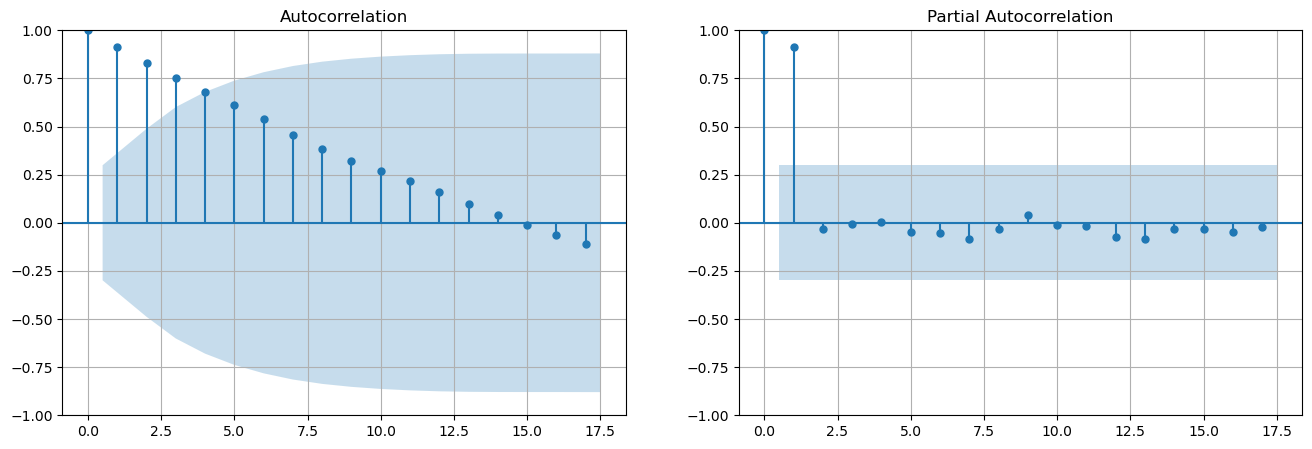

In [35]:
fig, ax = plt.subplots(1, 2, figsize = (16, 5))
plot_acf(y_hist, ax = ax[0]);
ax[0].grid()
plot_pacf(y_hist, ax = ax[1], method = 'ywm');
ax[1].grid()

In [36]:
arma = ARIMA(y_hist['Total Fee'], order = (1, 0, 1)).fit()

In [37]:
hist_preds = arma.predict()

2006-01-01    14979.886800
2007-01-01    15429.802255
2008-01-01    15382.533786
2009-01-01    16432.134994
2010-01-01    16811.163006
Freq: AS-JAN, Name: predicted_mean, dtype: float64


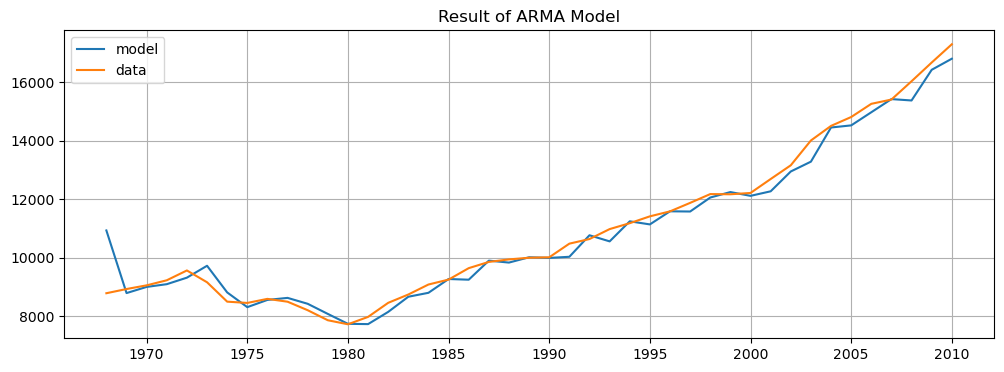

In [38]:
print(hist_preds.tail())
plt.figure(figsize = (12, 4))
plt.plot(hist_preds, label = 'model')
plt.plot(y_hist, label = 'data')
plt.legend()
plt.grid()
plt.title('Result of ARMA Model');

In [39]:
future_preds = arma.forecast(steps = len(y_future))

In [40]:
print(future_preds.tail())
print(y_future.tail())

2017-01-01    17398.464347
2018-01-01    17367.502072
2019-01-01    17336.688156
2020-01-01    17306.021888
2021-01-01    17275.502561
Freq: AS-JAN, Name: predicted_mean, dtype: float64
            Total Fee
Soy                  
2017-01-01      20225
2018-01-01      20468
2019-01-01      20652
2020-01-01      20762
2021-01-01      19920
